In [ ]:
print("Hello World")

Hello World


# Clase 01


In [ ]:
celsius = [0,10,20,30,40]

In [ ]:
far = [(x*(9/5))+32 for x in celsius]

In [ ]:
print(far)

[32.0, 50.0, 68.0, 86.0, 104.0]


In [ ]:
# Conteo de frecuencias
palabras = ["manzana", "naranja", "manzana", "pera", "naranja", "manzana"]

In [ ]:
dicci = {}
for i in palabras:
  dicci[i]= dicci.get(i,0)+1

print(dicci)

{'manzana': 3, 'naranja': 2, 'pera': 1}


# Clase 02

In [ ]:
def tiene_duplicado(lista):
  conjunto = set(lista)

  if len(conjunto) == len(lista):
    print(f'La lista {lista} no tiene duplicatos')
  else:
    print(f'La lista {lista} tiene duplicatos')

In [ ]:
lista_a = [1, 2, 3, 4, 5]
lista_b = [4, 5, 6, 7, 8]

In [ ]:
tiene_duplicado(lista_a)

La lista [1, 2, 3, 4, 5] no tiene duplicatos


In [ ]:
tiene_duplicado(lista_b)

La lista [4, 5, 6, 7, 8] no tiene duplicatos


In [ ]:
print(set(lista_a) - set(lista_b))
print(set(lista_b) - set(lista_a))
print(set(lista_a) ^ set(lista_b))

{1, 2, 3}
{8, 6, 7}
{1, 2, 3, 6, 7, 8}


Análisis de Calificaciones
Utilizando lo aprendido sobre diccionarios y listas, escribe una función que analice un conjunto de calificaciones de estudiantes y devuelva:

El promedio de calificaciones
La calificación más alta y la más baja
Un diccionario con los estudiantes agrupados por categoría:
"Excelente": >=9
"Bueno": >=7 y <9
"Regular": >=6 y <7
"Reprobado": <6
Datos de entrada:

In [ ]:
calificaciones = [
    {"nombre": "Ana", "calificacion": 9.5},
    {"nombre": "Carlos", "calificacion": 8.2},
    {"nombre": "Eva", "calificacion": 7.8},
    {"nombre": "David", "calificacion": 5.9},
    {"nombre": "Beatriz", "calificacion": 6.5},
    {"nombre": "Fernando", "calificacion": 9.2},
    {"nombre": "Gabriela", "calificacion": 4.8},
    {"nombre": "Héctor", "calificacion": 7.0}
]

In [ ]:
def analizar_calificaciones(calificaciones):
  notas = [i["calificacion"] for i in calificaciones]
  promedio = sum(notas)/len(notas)
  nota_min = min(notas)
  nota_max = max(notas)
  por_categoria = {
      "Excelente": [],
      "Bueno": [],
      "Regular": [],
      "Reprobado": []
  }

  for estudiantes in calificaciones:
    nota = estudiantes["calificacion"]
    nombre = estudiantes["nombre"]
    if nota >= 9:
      por_categoria["Excelente"].append(nombre)
    elif nota>= 7:
      por_categoria["Bueno"].append(nombre)
    elif nota >= 6:
      por_categoria["Regular"].append(nombre)
    else:
      por_categoria["Reprobado"].append(nombre)

  return {
    "promedio": promedio,
    "maxima": nota_max,
    "minima": nota_min,
    "por_categoria": por_categoria
}


In [ ]:
analizar_calificaciones(calificaciones)

{'promedio': 7.362499999999999,
 'maxima': 9.5,
 'minima': 4.8,
 'por_categoria': {'Excelente': ['Ana', 'Fernando'],
  'Bueno': ['Carlos', 'Eva', 'Héctor'],
  'Regular': ['Beatriz'],
  'Reprobado': ['David', 'Gabriela']}}

# Clase 03


Transformación y filtrado de datos de ventas
Enunciado:

Crea una función llamada procesar_ventas que procese registros de ventas. La función debe:

Recibir como parámetro una lista de diccionarios, donde cada diccionario representa una venta con los campos:

id: Identificador único de la venta (entero)

producto: Nombre del producto (cadena)

cantidad: Cantidad vendida (entero)

precio_unitario: Precio por unidad (flotante)

fecha: Fecha de la venta en formato "YYYY-MM-DD" (cadena)

Permitir un segundo parámetro opcional categoria_filtro que, si se proporciona, filtrará las ventas para incluir solo aquellas cuyo nombre de producto contenga esa categoría (subcadena).

Calcular y devolver un diccionario con:

total_ventas: Suma del valor total de todas las ventas (cantidad × precio_unitario)

producto_mas_vendido: Nombre del producto con mayor cantidad total vendida

venta_promedio: Valor promedio de las ventas individuales

ventas_por_mes: Diccionario con la suma de ventas agrupadas por mes (formato "YYYY-MM")


In [ ]:
ventas = [
    {"id": 1, "producto": "Laptop HP", "cantidad": 2, "precio_unitario": 800, "fecha": "2023-01-15"},
    {"id": 2, "producto": "Mouse Logitech", "cantidad": 5, "precio_unitario": 20, "fecha": "2023-01-20"},
    {"id": 3, "producto": "Teclado Logitech", "cantidad": 3, "precio_unitario": 30, "fecha": "2023-02-10"},
    {"id": 4, "producto": "Monitor Dell", "cantidad": 2, "precio_unitario": 200, "fecha": "2023-02-15"},
    {"id": 5, "producto": "Laptop Lenovo", "cantidad": 1, "precio_unitario": 900, "fecha": "2023-03-05"}
]

In [ ]:
from collections import defaultdict
def procesar_ventas(ventas, categoria_filtro=None):
  """
  Procesa registros de ventas, opcionalmente filtrando por categoría de producto.

  Args:
      ventas: Lista de diccionarios con información de ventas
      categoria_filtro: Si se proporciona, filtra ventas para incluir solo
                        productos que contengan esta subcadena

  Returns:
      Diccionario con estadísticas de ventas
  """
   # Filtrar ventas si se proporciona una categoría
  # Recomendable utilizar list comprehension
  if categoria_filtro:
    ventas_filtradas = [venta for venta in ventas
                        if categoria_filtro.lower() in venta["producto"].lower()]
  else:
    ventas_filtradas = ventas

  if not ventas_filtradas:
    return {
        "total_ventas": 0,
        "producto_mas_vendido": None,
        "venta_promedio": 0,
        "ventas_por_mes": {}
    }
  # Calcular total de ventas
  total_ventas = sum(venta["cantidad"] * venta["precio_unitario"] for venta in ventas)
  # Calcular producto más vendido

  ventas_por_producto = defaultdict(int)
  for venta in ventas_filtradas:
    ventas_por_producto[venta["producto"]] += venta["cantidad"]

  if ventas_por_producto:
    producto_mas_vendido = max(ventas_por_producto, key=ventas_por_producto.get)
  # Calcular venta promedio
  ventas_promedio = round(total_ventas/sum(venta["cantidad"] for venta in ventas),2)
  # Agrupar vetas por mes (ayudarse de slicing)
  ventas_por_mes = defaultdict(float)
  for venta in ventas_filtradas:
    mes = venta["fecha"][:7]
    ventas_por_mes[mes] += venta["cantidad"] * venta["precio_unitario"]

  return {
      "Total_Ventas":total_ventas,
      "Producto_mas_vendido": producto_mas_vendido,
      "venta_promedio": ventas_promedio,
      "ventas_por_mes": dict(ventas_por_mes)
  }


resultado = procesar_ventas(ventas)
print("Todas las ventas:")
print(resultado)

resultado_filtrado = procesar_ventas(ventas, "Laptop")
print("\nSolo laptops:")
print(resultado_filtrado)


Todas las ventas:
{'Total_Ventas': 3090, 'Producto_mas_vendido': 'Mouse Logitech', 'venta_promedio': 237.69, 'ventas_por_mes': {'2023-01': 1700.0, '2023-02': 490.0, '2023-03': 900.0}}

Solo laptops:
{'Total_Ventas': 3090, 'Producto_mas_vendido': 'Laptop HP', 'venta_promedio': 237.69, 'ventas_por_mes': {'2023-01': 1600.0, '2023-03': 900.0}}


#NUMPY

Fundamentos de los Arrays en NumPy

Cálculos con Arrays: Funciones Universales (ufuncs)

Operaciones en Arrays: Agregación de Datos

Operaciones en Arrays: Difusión de Datos (Broadcasting)

Arrays Booleanos y Máscaras

Indexación Avanzada en NumPy

Ordenamiento de Arrays en NumPy

Datos Estructurados en NumPy

Ejercicio 1: Manipulación básica de arrays
En este ejercicio trabajarás con las operaciones básicas de creación, indexación y modificación de arrays NumPy.

import numpy as np
np.random.seed(42)  # Para reproducibilidad

# 1.1 Crea un array unidimensional con los números del 1 al 10
###**array_1 = np.arange(1,11)**

# 1.2 Crea un array bidimensional de tamaño 3x4 con números aleatorios enteros entre 0 y 100
### **array_2 = np.random.randint(0,101,(3,4))**

# 1.3 Accede al elemento en la posición (1,2) del array bidimensional
### **array_2[1,2]**

# 1.4 Modifica todos los elementos de la primera fila del array bidimensional para que sean igual a 0
### **array_2[0] = 0**

# 1.5 Imprime los atributos ndim, shape, size y dtype del array bidimensional
### **print(array_2.ndim)**
### **print(array_2.shape)**
### **print(array_2.size)**
### **print(array_2.dtype)**

In [ ]:
import numpy as np
np.random.seed(42)
# np.random.randint

In [ ]:
array_1 = np.arange(1,11)

array_2 = np.random.randint(0,101,(3,4))
print(array_2)
print(array_2[1,2])


array_2[0] = 0
print(array_2)
print(array_2.ndim)
print(array_2.shape)
print(array_2.size)
print(array_2.dtype)


[[51 92 14 71]
 [60 20 82 86]
 [74 74 87 99]]
82
[[ 0  0  0  0]
 [60 20 82 86]
 [74 74 87 99]]
2
(3, 4)
12
int64


Ejercicio 2: Slicing y vistas de arrays
Este ejercicio te ayudará a comprender mejor el funcionamiento del slicing en NumPy y la diferencia entre vistas y copias de arrays.

import numpy as np

# **Crea una matriz de 5x5 con valores del 1 al 25**
###matriz = np.arange(1, 26).reshape(5, 5)
###print("Matriz original:")
###print(matriz)

# **2.1 Extrae una submatriz de 3x3 que contenga los elementos centrales de la matriz original**
### submatriz = matriz[1:4,1:4]

# **2.2 Modifica todos los elementos de la submatriz para que sean igual a 0 y observa qué pasa con la matriz original**
### matriz[1:4,1:4] = 0
###print(submatriz)
###print(matriz)

# **2.3 Ahora crea una copia explícita de la submatriz central (3x3)**
### matriz_copia = matriz[1:4,1:4].copy()

# **2.4 Modifica los elementos de la copia para que sean igual a 99 y verifica que la matriz original no cambia**
### matriz_copia[:,:] = 99

# **2.5 Extrae la última columna de la matriz original**
### print(matriz[:,-1:])

# **2.6 Extrae las filas pares de la matriz original (filas 0, 2, 4)**
### print(matriz[:,::2])

In [ ]:
matriz = np.arange(1, 26).reshape(5, 5)
print("Matriz Original:")
print(matriz)
submatriz = matriz[1:4,1:4]
print("SubMatriz")
print(submatriz)
matriz_copia = matriz[1:4,1:4].copy()
matriz[1:4,1:4] = 0
print("SubMatriz alterada por slice")
print(submatriz)
print("Matriz Original")
print(matriz)
print("Matriz Copia")
print(matriz_copia)
matriz_copia[:,:] = 99
print("Matriz Copia alteración 99")
print(matriz_copia)
print("Matriz Original")
print(matriz)
print("Extrair la ultima columna de la matriz original")
print(matriz[:,-1:])
print("Extrair las columnas pares de la matriz original")
print(matriz[::2])

Matriz Original:
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]]
SubMatriz
[[ 7  8  9]
 [12 13 14]
 [17 18 19]]
SubMatriz alterada por slice
[[0 0 0]
 [0 0 0]
 [0 0 0]]
Matriz Original
[[ 1  2  3  4  5]
 [ 6  0  0  0 10]
 [11  0  0  0 15]
 [16  0  0  0 20]
 [21 22 23 24 25]]
Matriz Copia
[[ 7  8  9]
 [12 13 14]
 [17 18 19]]
Matriz Copia alteración 99
[[99 99 99]
 [99 99 99]
 [99 99 99]]
Matriz Original
[[ 1  2  3  4  5]
 [ 6  0  0  0 10]
 [11  0  0  0 15]
 [16  0  0  0 20]
 [21 22 23 24 25]]
Extrair la ultima columna de la matriz original
[[ 5]
 [10]
 [15]
 [20]
 [25]]
Extrair las columnas pares de la matriz original
[[ 1  2  3  4  5]
 [11  0  0  0 15]
 [21 22 23 24 25]]


Ejercicio 3: Concatenación, división y reshape de arrays
Este ejercicio se centra en las operaciones de unión, división y cambio de forma de arrays NumPy.

import numpy as np

# **3.1 Crea dos arrays:**
# **- Un array 'a' de forma (3,2) con valores del 1 al 6**
# **- Un array 'b' de forma (3,2) con valores del 7 al 12**
### array_a = np.arange(1,7).reshape(3,2)
###print(array_a)
###array_b = np.arange(7,13).reshape(2,3)
###print(array_b)

# **3.2 Concatena los arrays 'a' y 'b' horizontalmente (a lo largo del eje 1)**
### array_b_reshape = array_b.reshape(3,2)
###array_c = np.concatenate([array_a,array_b_reshape],axis=1)
###print(array_c)

# **3.3 Concatena los arrays 'a' y 'b' verticalmente (a lo largo del eje 0)**
### array_d = np.concatenate([array_a,array_b_reshape],axis=0)
###print(array_d)

# **3.4 Crea un array unidimensional 'c' con valores del 1 al 12**
###c = np.arange(1,13)
###print(c)

# **3.5 Utiliza reshape para convertir 'c' en un array de forma (4,3)**
###c_reshape = c.reshape(4,3)

# **3.6 Divide el array del paso anterior en 2 arrays de forma (2,3) usando np.split**
###c_parte_1, c_parte_2 = np.array_split(c_reshape,2)
###print(c_parte_1)
###print(c_parte_2)

# **3.7 Crea un array unidimensional 'd' con valores del 1 al 3 y conviértelo en:**
###d = np.arange(1,4)
# **- Un vector fila (forma 1x3) usando np.newaxis**
###print(d[np.newaxis,:])
# **- Un vector columna (forma 3x1) usando np.newaxis**
###print(d[:,np.newaxis])

# **3.8 Crea una matriz 4x4 con valores del 1 al 16 y divídela en 4 submatrices de 2x2 usando vsplit y hsplit**
# Tu código aquí

In [ ]:
array_a = np.arange(1,7).reshape(3,2)
print(array_a)
array_b = np.arange(7,13).reshape(2,3)
print(array_b)
#Concatena los arrays 'a' y 'b' horizontalmente (a lo largo del eje 1)
array_b_reshape = array_b.reshape(3,2)
array_c = np.concatenate([array_a,array_b_reshape],axis=1)
print(array_c)
array_d = np.concatenate([array_a,array_b_reshape],axis=0)
print(array_d)
#Crea un array unidimensional 'c' con valores del 1 al 12
c = np.arange(1,13)
print(c)
c_reshape = c.reshape(4,3)
print(c_reshape)
#3.6 Divide el array del paso anterior en 2 arrays de forma (2,3) usando np.split
c_parte_1, c_parte_2 = np.array_split(c_reshape,2)
print(c_parte_1)
print(c_parte_2)
#Crea un array unidimensional 'd' con valores del 1 al 3 y conviértelo en:
d = np.arange(1,4)
print(d)
#- Un vector fila (forma 1x3) usando np.newaxis
print(d[np.newaxis,:])
#- Un vector columna (forma 3x1) usando np.newaxis
print(d[:,np.newaxis])
#Crea una matriz 4x4 con valores del 1 al 16 y divídela en 4 submatrices de 2x2
matriz_4x4 = np.arange(1,17).reshape(4,4)
print("matriz 4x4")
print(matriz_4x4)
#dividir matriz original en 2 partes
matriz_partes = np.hsplit(matriz_4x4,2)
print(matriz_partes)
#Dividir las partes de la matriz_partes para obtener matrizes 2x2
matriz_2x2_1, matriz_2x2_2 =np.vsplit(matriz_partes[0],2)
matriz_2x2_3, matriz_2x2_4 = np.vsplit(matriz_partes[1],2)
print("matriz 2x2 1 ")
print(matriz_2x2_1)
print("matriz 2x2 2")
print(matriz_2x2_2)
print("matriz 2x2 3")
print(matriz_2x2_3)
print("matriz 2x2 4")
print(matriz_2x2_4)


[[1 2]
 [3 4]
 [5 6]]
[[ 7  8  9]
 [10 11 12]]
[[ 1  2  7  8]
 [ 3  4  9 10]
 [ 5  6 11 12]]
[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]
 [11 12]]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[[1 2 3]
 [4 5 6]]
[[ 7  8  9]
 [10 11 12]]
[1 2 3]
[[1 2 3]]
[[1]
 [2]
 [3]]
matriz 4x4
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]
[array([[ 1,  2],
       [ 5,  6],
       [ 9, 10],
       [13, 14]]), array([[ 3,  4],
       [ 7,  8],
       [11, 12],
       [15, 16]])]
matriz 2x2 1 
[[1 2]
 [5 6]]
matriz 2x2 2
[[ 9 10]
 [13 14]]
matriz 2x2 3
[[3 4]
 [7 8]]
matriz 2x2 4
[[11 12]
 [15 16]]


# Ejercicios de Repaso: Funciones Universales en NumPy

In [ ]:
# Ejercicios de Repaso: Funciones Universales en NumPy

## Ejercicio 1: Operaciones Aritméticas con ufuncs

#En este ejercicio practicarás el uso de operaciones aritméticas con ufuncs de NumPy.

#python
import numpy as np

# 1.1 Crea un array unidimensional x con valores del 0 al 9
x = np.arange(1,10)
print(x)
# 1.2 Aplica las siguientes operaciones aritméticas a x y muestra el resultado:
# - Suma 5 a todos los elementos
# - Resta 2 a todos los elementos
# - Multiplica todos los elementos por 3
# - Divide todos los elementos por 2
# - Calcula el resto de la división por 2 (módulo 2)
print(np.add(x,5))
print(np.subtract(x,2))
print(np.multiply(x,3))
print(np.divide(x,2))
print(np.mod(x,2))
# 1.3 Crea un array y con valores del 10 al 19 y suma los arrays x e y
y = np.arange(10,19)

print(y)
print(np.add(x,y))
# 1.4 Calcula el valor negativo de x
print(f"Negativo: {-x}")

# 1.5 Eleva los elementos de x al cuadrado utilizando el operador ** y luego utilizando la función np.power
print(x**2)
print(np.power(x,2))

# 1.6 Crea una expresión que combine varias operaciones: (x * 2) + 10 - (x ** 2)
expresion = (np.multiply(x,2)) + 10 - (np.power(x,2))
print(f'Expresion: {expresion}')




[1 2 3 4 5 6 7 8 9]
[ 6  7  8  9 10 11 12 13 14]
[-1  0  1  2  3  4  5  6  7]
[ 3  6  9 12 15 18 21 24 27]
[0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5]
[1 0 1 0 1 0 1 0 1]
[10 11 12 13 14 15 16 17 18]
[11 13 15 17 19 21 23 25 27]
Negativo: [-1 -2 -3 -4 -5 -6 -7 -8 -9]
[ 1  4  9 16 25 36 49 64 81]
[ 1  4  9 16 25 36 49 64 81]
Expresion: [ 11  10   7   2  -5 -14 -25 -38 -53]


In [ ]:
## Ejercicio 2: Funciones Matemáticas con ufuncs

#En este ejercicio practicarás el uso de funciones matemáticas de NumPy.

#python
import numpy as np

# 2.1 Crea un array x con valores negativos y positivos: [-3, -2, -1, 0, 1, 2, 3]
x = np.array([-3, -2, -1, 0, 1, 2, 3])

print(x)

# 2.2 Calcula el valor absoluto de x usando la función abs() y también np.absolute()
print(np.abs(x))

# 2.3 Crea un array de ángulos con valores [0, π/4, π/2, π] y calcula:

# - El seno de cada ángulo
# - El coseno de cada ángulo
# - La tangente de cada ángulo
angulos = np.array([0, np.pi/4, np.pi/2, np.pi])
print(angulos)
print(np.sin(angulos))
print(np.cos(angulos))
print(np.tan(angulos))

# 2.4 Usando el array x = [0, 0.5, 1], calcula:
# - El arcoseno de x
# - El arcocoseno de x
# - El arcotangente de x
x = np.array([0, 0.5, 1])
print(x)
print(np.arcsin(x))
print(np.arccos(x))
print(np.arctan(x))

# 2.5 Crea un array x con valores [1, 2, 3] y calcula:
# - e^x (exponencial)
# - 2^x
# - log(x) (logaritmo natural)
# - log2(x) (logaritmo base 2)
# - log10(x) (logaritmo base 10)
x = np.array([1,2,3])
print(x)
print(np.exp(x))
print(np.exp2(x))
print(np.log(x))
print(np.log2(x))
print(np.log10(x))

[-3 -2 -1  0  1  2  3]
[3 2 1 0 1 2 3]
[0.         0.78539816 1.57079633 3.14159265]
[0.00000000e+00 7.07106781e-01 1.00000000e+00 1.22464680e-16]
[ 1.00000000e+00  7.07106781e-01  6.12323400e-17 -1.00000000e+00]
[ 0.00000000e+00  1.00000000e+00  1.63312394e+16 -1.22464680e-16]
[0.  0.5 1. ]
[0.         0.52359878 1.57079633]
[1.57079633 1.04719755 0.        ]
[0.         0.46364761 0.78539816]
[1 2 3]
[ 2.71828183  7.3890561  20.08553692]
[2. 4. 8.]
[0.         0.69314718 1.09861229]
[0.        1.        1.5849625]
[0.         0.30103    0.47712125]


In [ ]:

## Ejercicio 3: Características Avanzadas de ufuncs

#En este ejercicio explorarás características más avanzadas de las ufuncs de NumPy.

#```python
import numpy as np

# 3.1 Crea un array x con valores del 1 al 5
x = np.arange(1,6)
print(x)
# 3.2 Crea un array y vacío de la misma longitud que x y utiliza el parámetro out para
# almacenar directamente el resultado de multiplicar x por 10 en y
y = np.empty(5)
print(y)
print(np.multiply(x,10, out=y))


# 3.3 Utiliza el método reduce con la función add para calcular la suma de todos los elementos de x
# Compara el resultado con np.sum(x)
print(np.add.reduce(x,0))
print(np.sum(x))

# 3.4 Utiliza el método accumulate con la función add para calcular la suma acumulativa de x
# Compara el resultado con np.cumsum(x)
print(np.add.accumulate(x))
print(np.cumsum(x))

# 3.5 Utiliza el método outer con la función multiply para crear una tabla de multiplicar
# con los valores de x
print(np.multiply.outer(x,x))

[1 2 3 4 5]
[4.9e-324 9.9e-324 1.5e-323 2.0e-323 2.5e-323]
[10. 20. 30. 40. 50.]
15
15
[ 1  3  6 10 15]
[ 1  3  6 10 15]
[[ 1  2  3  4  5]
 [ 2  4  6  8 10]
 [ 3  6  9 12 15]
 [ 4  8 12 16 20]
 [ 5 10 15 20 25]]


In [ ]:
import pandas as pd
data = pd.read_csv("president_heights.csv", sep=",")
heights = np.array(data["height(cm)"])
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185 191 182]


#Ejercicios de Repaso: Agregaciones en NumPy

In [ ]:

#Ejercicio 1: Agregaciones Básicas
#En este ejercicio, practicarás el uso de funciones de agregación básicas de NumPy con arrays unidimensionales y multidimensionales.

import numpy as np
rng = np.random.default_rng(seed=42)

# 1.1 Crea un array unidimensional con 10 números aleatorios entre 0 y 100
array = rng.integers(0,101,10)
print(array)

# 1.2 Calcula la suma, el valor mínimo, el valor máximo, la media y la desviación estándar del array
print(array.sum())
print(array.min())
print(array.max())
print(array.mean())
print(array.std())

# 1.3 Crea una matriz (array bidimensional) de tamaño 4x5 con números aleatorios enteros entre 1 y 50
array_b = rng.integers(1,51,(4,5))
print(array_b)

# 1.4 Calcula la suma de todos los elementos de la matriz
print(np.sum(array_b))

# 1.5 Calcula la suma de cada fila de la matriz (a lo largo del eje 1)
print(array_b.sum(axis=1))

# 1.6 Calcula la suma de cada columna de la matriz (a lo largo del eje 0)
print(array_b.sum(axis=0))

# 1.7 Encuentra el valor máximo de cada fila y el valor mínimo de cada columna
print(array_b.max(axis=1))
print(array_b.min(axis=0))

[ 9 78 66 44 43 86  8 70 20  9]
433
8
86
43.3
28.979475495598603
[[27 49 37 39 36]
 [40 26  7 42 23]
 [26 19 10 47 40]
 [33 21 42 28 23]]
615
[188 138 142 147]
[126 115  96 156 122]
[49 42 47 42]
[26 19  7 28 23]


#Ejercicio 2: Comparación de Métodos de Agregación

In [ ]:

#En este ejercicio, compararás el rendimiento y uso de diferentes métodos de agregación, tanto los nativos de Python como los de NumPy.

import numpy as np
import time
rng = np.random.default_rng(seed=42)

# 2.1 Crea un array grande con un millón de números aleatorios entre 0 y 1
big_array = rng.random(1_000_000)
print(big_array)

# 2.2 Mide el tiempo que tarda la función sum() de Python en calcular la suma

start_python = time.time()
%timeit sum(big_array)
end_python = time.time() - start_python
# 2.3 Mide el tiempo que tarda np.sum() en calcular la suma
start_np_sum = time.time()
%timeit np.sum(big_array)
end_np_sum = time.time() - start_np_sum
# 2.4 Mide el tiempo que tarda el método .sum() del array en calcular la suma
start_sum = time.time()
%timeit big_array.sum()
end_sum = time.time() - start_sum
# 2.5 Compara los resultados de tiempo y muestra cuál método es más rápido y por qué factor
print(f'Camparacion de velocidad: ')
print(f'Función sum() de Python: {end_python:.2f} segundos')
print(f'Función np.sum() de Numpy: {end_np_sum:.2f} segundos')
print(f'Función sum() de Python: {end_sum:.2f} segundos')

# 2.6 Repite las mediciones para las funciones min/max y np.min/np.max y compara
#MIN
start_min = time.time()
%timeit min(big_array)
end_min = time.time() - start_min
#MAX
start_max = time.time()
%timeit max(big_array)
end_max = time.time() - start_max
#NP.MIN
start_npmin = time.time()
%timeit np.min(big_array)
end_npmin= time.time() - start_npmin
#NPMAX
start_npmax = time.time()
%timeit np.max(big_array)
end_npmax= time.time() - start_npmax

print(f'Camparacion de velocidad: ')
print(f'Función min() de Python: {end_min:.2f} segundos')
print(f'Función max() de Numpy: {end_max:.2f} segundos')
print(f'Función np.min() de Python: {end_npmin:.2f} segundos')
print(f'Función np.max() de Python: {end_npmax:.2f} segundos')

[0.77395605 0.43887844 0.85859792 ... 0.55082789 0.98694171 0.66717687]
114 ms ± 37.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
356 µs ± 11.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
382 µs ± 61.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Camparacion de velocidad: 
Función sum() de Python: 9.08 segundos
Función np.sum() de Numpy: 2.92 segundos
Función sum() de Python: 3.29 segundos
83.2 ms ± 26.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
63.3 ms ± 671 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
400 µs ± 13 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
510 µs ± 47.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Camparacion de velocidad: 
Función min() de Python: 6.54 segundos
Función max() de Numpy: 5.14 segundos
Función np.min() de Python: 3.25 segundos
Función np.max() de Python: 4.03 segundos


#Ejercicio 3: Análisis de Datos con Agregaciones

[ -6  25  20  10   9  29  -7  22  -1  -6  14  34  23  25  23  26  13  -5
  28  10  13   7  -2  32  25  19   8  27  15  10  10   0  -6  15  30  -8
  29  28   2  19  -3  24  22   6  -7  34  10  31  21  25  24  -2   6  11
  12  -8  15  -3  24  21  32  24   6  34   8   4  31   7  -7  11  26  -2
  11  -5  21  11   5   0  15  20  33  10  -3  28  18  22  -6   4  25  28
  10  27  28   7  31   3   1  21  19  -4  28  -1  27 -10  26  26  25  20
  11  22   2  25  15  11  13  16  -9  -4   1  -5  10  20  20  11  29  16
  -7  25  16  19  16  15  -6  15  26   3  17  -9   5  10  35  -1   2   8
  35  29  -9   0  27  -8  29   2  32   3   9  20  -5  15  13  26  35  20
   8   8   9  27   4  -3   5  -9  -6  -6  25  23  22  11  22  -3  31  13
  33  -3  12  22  12  10  -3   7   0   3  21  18  17   6  34  -6   5  -5
   5  34   6  31  12  22  11   2  25  34   2  25   2  22  26  10  23   2
  -7  -6  10  31  -5  10  22  -1  23   4  27  16  15  -2  11  29 -10  24
  12  23  20   9   4  18  -4  16  -6  19  18  -7  2

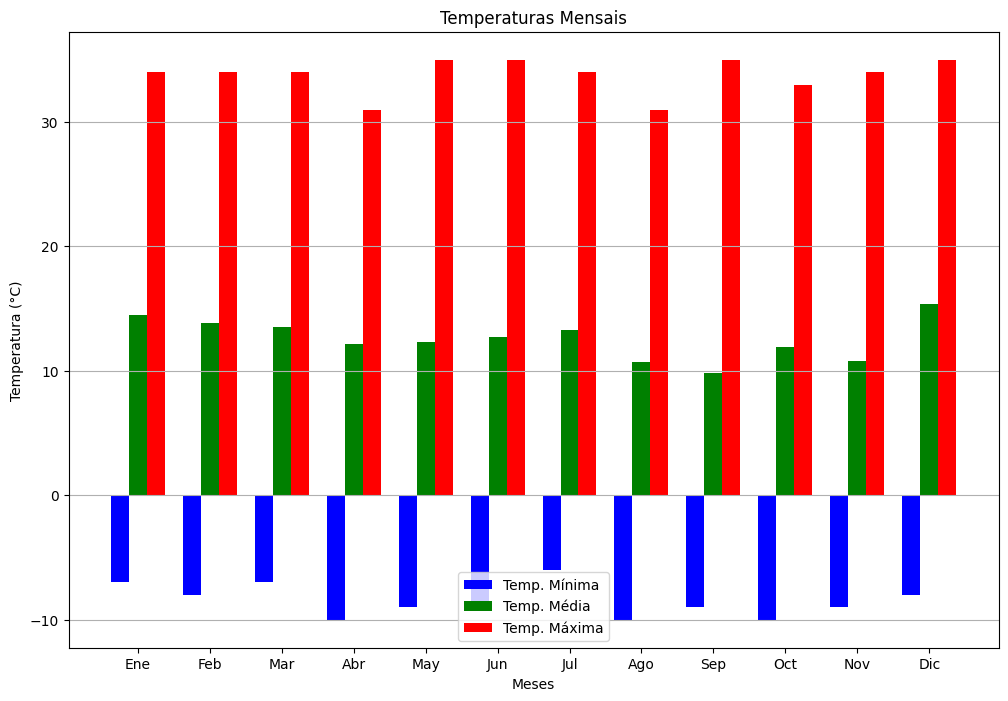

Percentil 25
2.0
Percentil 75
24.0


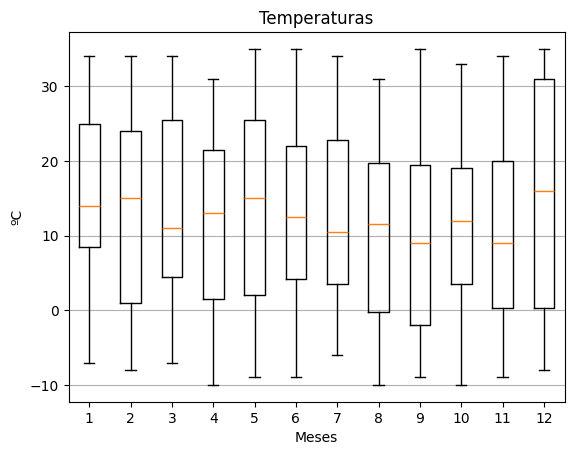

Días con temperaturas superiores a 30ºC : 38
Días con temperaturas inferiores a 0ºC : 76
38
76


In [ ]:

#En este ejercicio, trabajarás con un conjunto de datos simulado de temperaturas mensuales y utilizarás agregaciones para analizarlo.

import numpy as np
import matplotlib.pyplot as plt
rng = np.random.default_rng(seed=42)

# 3.1 Crea un array que represente las temperaturas diarias (en °C) durante un año (365 días)
# con valores aleatorios que oscilen entre -10°C y 35°C
temperaturas = rng.integers(-10,36,365)
print(temperaturas)

# 3.2 Calcula la temperatura media, mínima y máxima para todo el año
temp_media = np.mean(temperaturas)
print(f'{temp_media:.2f}')
temp_min = np.min(temperaturas)
print(temp_min)
temp_max = np.max(temperaturas)
print(temp_max)


# 3.3 Convierte los datos diarios en datos mensuales calculando la temperatura media de cada mes
# Sugerencia: puedes agrupar los datos en 12 grupos (simplificando a 30 días por mes)
meses = np.array_split(temperaturas,12)
print(meses)

# 3.4 Identifica el mes más caluroso y el mes más frío basándote en las temperaturas medias
temperatura_media = [round(np.mean(x),2) for x in meses]
print(temperatura_media)
mes_mas_caluroso = np.argmax(temperatura_media) + 1
print(mes_mas_caluroso)
mes_mas_frio = np.argmin(temperatura_media)+1
print(mes_mas_frio)
print(f"El mes mas caluroso fue: mes '{mes_mas_caluroso}', com {np.max(temperatura_media)} ºC")
print(f"El mes mas frio fue: mes '{mes_mas_frio}', com {np.min(temperatura_media)} ºC")

# 3.5 Calcula la desviación estándar de las temperaturas para cada mes para medir la variabilidad
desviacion = [round(np.std(x),2) for x  in meses]
print("Desviacion estandar")
print(desviacion)

# 3.6 Crea un gráfico que muestre las temperaturas medias, mínimas y máximas para cada mes
meses_name = ["Ene","Feb","Mar","Abr","May","Jun","Jul","Ago","Sep","Oct","Nov","Dic"]

min_temp = [np.min(valor) for valor in meses]
max_temp = [np.max(valor) for valor in meses]
print(min_temp)
print(max_temp)
# sitio de las barras
x = np.arange(len(meses))

# Ancho de las barras
largura = 0.25

# Criar gráfico de barras
plt.figure(figsize=(12, 8))
plt.bar(x - largura, min_temp, width=largura, label='Temp. Mínima', color='blue')
plt.bar(x, temperatura_media, width=largura, label='Temp. Média', color='green')
plt.bar(x + largura, max_temp, width=largura, label='Temp. Máxima', color='red')

# Adicionando rótulos e legenda
plt.xticks(x, meses_name)
plt.xlabel('Meses')
plt.ylabel('Temperatura (°C)')
plt.title('Temperaturas Mensais')
plt.legend()
plt.grid(axis='y', linestyle='-')
plt.show()


# 3.7 Calcula el percentil 75 y 25 de las temperaturas para todo el año
percentil_25 = np.percentile(temperaturas,25)
print("Percentil 25")
print(percentil_25)
percentil_75 = np.percentile(temperaturas,75)
print("Percentil 75")
print(percentil_75)
plt.boxplot(meses)
plt.title('Temperaturas')
plt.ylabel('ºC')
plt.xlabel('Meses')
plt.grid(axis='y', linestyle='-')
plt.show()
# 3.8 Calcula cuántos días del año tuvieron temperaturas superiores a 30°C e inferiores a 0°C
temperaturas_superiores_30 = [x for x in temperaturas if x > 30]
print(f'Días con temperaturas superiores a 30ºC : {len(temperaturas_superiores_30)}')
temperaturas_inferiores_0 = [x for x in temperaturas if x < 0]
print(f'Días con temperaturas inferiores a 0ºC : {len(temperaturas_inferiores_0)}')
print(np.sum(temperaturas > 30))
print(np.sum(temperaturas < 0))


#Ejercicios de Broadcasting en NumPy
#Ejercicio 1: Operaciones básicas con Broadcasting

In [ ]:
import numpy as np

# 1.1 Crea un array unidimensional x con valores del 0 al 9
x = np.arange(10)
print(x)

# 1.2 Crea un array columna y con valores del 10 al 19 (usa reshape o np.newaxis)
y = np.arange(10,20)[:,np.newaxis]
print(y)

# 1.3 Suma los arrays x e y usando broadcasting y muestra el resultado
# ¿Qué forma tiene el resultado? Resp.: una matriz 10x10
suma_x_y = x + y
print(suma_x_y, suma_x_y.shape)

# 1.4 Crea una matriz 3x3 de unos
matriz_uno = np.ones((3,3))
print(matriz_uno)

# 1.5 Multiplica la matriz de unos por el array x
# ¿Qué ocurre con cada fila de la matriz?

print(matriz_uno * x[:3]) #slice para no dar error

# 1.6 Resta el array columna y a la matriz de unos
# ¿Qué ocurre con cada columna de la matriz?
resta = matriz_uno - y[:3]
print(y[:3])
print(resta)

[0 1 2 3 4 5 6 7 8 9]
[[10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]]
[[10 11 12 13 14 15 16 17 18 19]
 [11 12 13 14 15 16 17 18 19 20]
 [12 13 14 15 16 17 18 19 20 21]
 [13 14 15 16 17 18 19 20 21 22]
 [14 15 16 17 18 19 20 21 22 23]
 [15 16 17 18 19 20 21 22 23 24]
 [16 17 18 19 20 21 22 23 24 25]
 [17 18 19 20 21 22 23 24 25 26]
 [18 19 20 21 22 23 24 25 26 27]
 [19 20 21 22 23 24 25 26 27 28]] (10, 10)
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[0. 1. 2.]
 [0. 1. 2.]
 [0. 1. 2.]]
[[10]
 [11]
 [12]]
[[ -9.  -9.  -9.]
 [-10. -10. -10.]
 [-11. -11. -11.]]


#Ejercicio 2: Broadcasting con matrices y vectores
#En este ejercicio practicarás cómo usar broadcasting para realizar operaciones comunes en análisis de datos.

In [ ]:
import numpy as np
np.random.seed(42)
# 2.1 Crea una matriz de datos X con forma (4, 3) con valores aleatorios entre 0 y 1
X = np.random.random((4,3))
print(X)

# 2.2 Calcula la media de cada columna de X
media = X.mean(0)
print(media)

# 2.3 Usa broadcasting para centrar los datos (restar a cada columna su media)
datos_resta = X - media
print(datos_resta)

# 2.4 Crea un array de pesos w con forma (3,) con valores [0.1, 0.5, 0.9]
pesos = np.array([0.1,0.5,0.9])
print(pesos)

# 2.5 Usa broadcasting para multiplicar cada columna de X por el peso correspondiente
ponderada_x = X * pesos
print(ponderada_x)


# 2.6 Suma las filas de la matriz ponderada para obtener un vector de puntuaciones
print(np.sum(ponderada_x,axis=1))

[[0.37454012 0.95071431 0.73199394]
 [0.59865848 0.15601864 0.15599452]
 [0.05808361 0.86617615 0.60111501]
 [0.70807258 0.02058449 0.96990985]]
[0.4348387  0.4983734  0.61475333]
[[-0.06029858  0.45234091  0.11724061]
 [ 0.16381979 -0.34235476 -0.45875881]
 [-0.37675509  0.36780275 -0.01363832]
 [ 0.27323388 -0.4777889   0.35515652]]
[0.1 0.5 0.9]
[[0.03745401 0.47535715 0.65879455]
 [0.05986585 0.07800932 0.14039507]
 [0.00580836 0.43308807 0.54100351]
 [0.07080726 0.01029225 0.87291887]]
[1.17160571 0.27827024 0.97989994 0.95401837]


#Ejercicio 3: Visualización con Broadcasting
#En este ejercicio usarás broadcasting para crear visualizaciones de funciones matemáticas.

[-5.         -4.79591837 -4.59183673 -4.3877551  -4.18367347 -3.97959184
 -3.7755102  -3.57142857 -3.36734694 -3.16326531 -2.95918367 -2.75510204
 -2.55102041 -2.34693878 -2.14285714 -1.93877551 -1.73469388 -1.53061224
 -1.32653061 -1.12244898 -0.91836735 -0.71428571 -0.51020408 -0.30612245
 -0.10204082  0.10204082  0.30612245  0.51020408  0.71428571  0.91836735
  1.12244898  1.32653061  1.53061224  1.73469388  1.93877551  2.14285714
  2.34693878  2.55102041  2.75510204  2.95918367  3.16326531  3.36734694
  3.57142857  3.7755102   3.97959184  4.18367347  4.3877551   4.59183673
  4.79591837  5.        ]
[[-5.        ]
 [-4.79591837]
 [-4.59183673]
 [-4.3877551 ]
 [-4.18367347]
 [-3.97959184]
 [-3.7755102 ]
 [-3.57142857]
 [-3.36734694]
 [-3.16326531]
 [-2.95918367]
 [-2.75510204]
 [-2.55102041]
 [-2.34693878]
 [-2.14285714]
 [-1.93877551]
 [-1.73469388]
 [-1.53061224]
 [-1.32653061]
 [-1.12244898]
 [-0.91836735]
 [-0.71428571]
 [-0.51020408]
 [-0.30612245]
 [-0.10204082]
 [ 0.10204082]


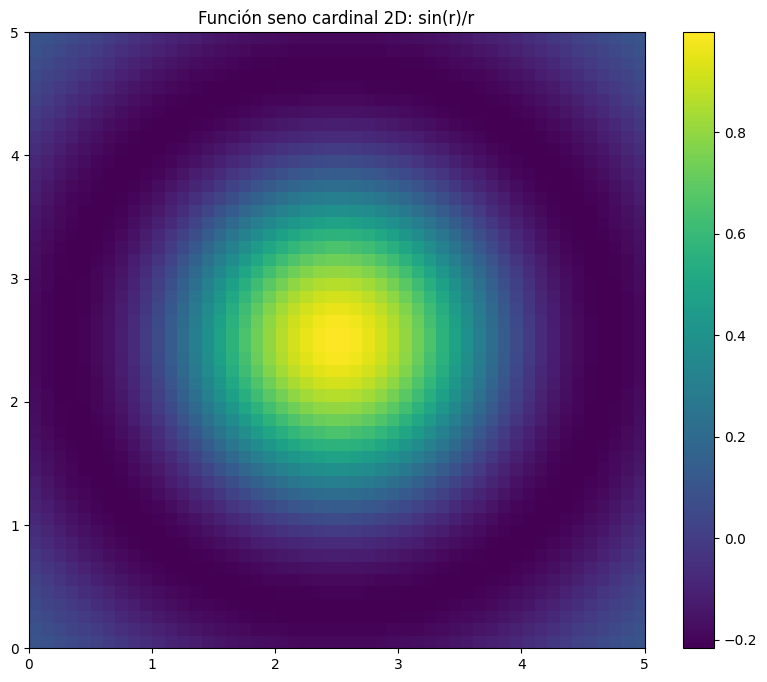

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 3.1 Crea un array x con 50 valores equidistantes entre -5 y 5
x = np.linspace(-5,5,50)
print(x)

# 3.2 Crea un array y con 50 valores equidistantes entre -5 y 5
# y conviértelo en un array columna
y = np.linspace(-5,5,50)[:,np.newaxis]
print(y)

# 3.3 Usa broadcasting para calcular la distancia de cada punto (x,y) al origen
# Fórmula: d = sqrt(x² + y²)
print("-------d-------")
d = np.sqrt(x**2 + y**2)
print(d,d.shape)

# 3.4 Usa la distancia para calcular z = sin(d)/d
# (Esta es la función seno cardinal o sinc en 2D)
# Para evitar la división por cero, puedes usar np.where o np.divide con out=np.zeros_like
z = np.where(d>1e-10,np.sin(d)/d,1)
print("-------z-------")
print(z)

# 3.5 Visualiza la función como un mapa de calor
plt.figure(figsize=(10, 8))
# Tu código para mostrar z como una imagen
plt.imshow(z, origin='lower', extent=[0, 5, 0, 5])
plt.colorbar()
plt.title('Función seno cardinal 2D: sin(r)/r')
plt.show()

#Ejercicios de Arrays Booleanos y Máscaras en NumPy

#Ejercicio 1: Operaciones básicas con arrays booleanos
#En este ejercicio practicarás el uso de operaciones de comparación y arrays booleanos en NumPy.

In [ ]:
import numpy as np

# 1.1 Crea un array x con los valores del 0 al 9
x = np.arange(10)
print(x)

# 1.2 Crea un array booleano que sea True para los elementos mayores que 5
array_true = x>5
print(array_true)

# 1.3 Crea un array booleano que sea True para los elementos pares
# (pista: utiliza el operador módulo %)
array_par = x%2==0
print(array_par)

# 1.4 Usando operadores lógicos (&, |), crea un array booleano que sea True
# para los elementos que sean pares Y mayores que 5
array = (x%2== 0) & (x >5)
print(array)

# 1.5 Cuenta cuántos elementos son pares O mayores que 5
print(np.count_nonzero((x%2== 0) | (x >5)))
print(np.sum((x%2== 0) | (x >5)))

# 1.6 Extrae en un nuevo array todos los elementos que sean
# impares Y menores que 5
array_impar = (x%2 != 0) & (x<5)
print(array_impar)

[0 1 2 3 4 5 6 7 8 9]
[False False False False False False  True  True  True  True]
[ True False  True False  True False  True False  True False]
[False False False False False False  True False  True False]
7
7
[False  True False  True False False False False False False]


#Ejercicio 2: Manipulación de datos con máscaras booleanas
#En este ejercicio utilizarás máscaras booleanas para realizar operaciones sobre un conjunto de datos de temperaturas.

In [ ]:
import numpy as np

# 2.1 Crea un array temperaturas con 30 valores aleatorios enteros entre 0 y 35
# que representarán temperaturas diarias en grados Celsius
np.random.seed(42)  # Para reproducibilidad
temperaturas = np.random.randint(0,36,30)
print(temperaturas)

# 2.2 Crea una máscara para los días con temperaturas superiores a 25°C (días calurosos)
print(temperaturas  > 25)
# 2.3 Crea una máscara para los días con temperaturas inferiores a 10°C (días fríos)
print(temperaturas  < 10)

# 2.4 ¿Cuántos días fueron calurosos?
print(np.sum(temperaturas  > 25))

# 2.5 ¿Cuál fue la temperatura media de los días fríos?
dias_frios = temperaturas[temperaturas < 10]
print(dias_frios)
print("Media dias Frios")
print(round(np.mean(dias_frios),2))

# 2.6 Crea una máscara para los días con temperaturas "moderadas" (entre 15°C y 25°C inclusive)
temp_moderada = temperaturas[(temperaturas > 15) & (temperaturas < 25)]
print(temp_moderada)

# 2.7 Reemplaza las temperaturas de los días fríos por 10°C
print("Print, valores de la variable 'temperaturas' original")
print(temperaturas)
temp_reemplazada = temperaturas.copy()
temp_reemplazada[temperaturas < 10]=10
print("Print, valores de la variable 'temperaturas' despues de reemplazar valores")

print(temperaturas)
print("Porque los valores de la variable 'temp_reemplazada' no son los mismos de 'temperaturas' despues de reemplazar los valores?")
print(temp_reemplazada)

# 2.8 Muestra las 5 temperaturas más altas registradas
# (pista: puedes usar np.sort() y arrays booleanos)
temp_alta = np.sort(temperaturas)
print(temp_alta)
print(temp_alta[-1:-6:-1])

[28 14  7 20 18 22 10 10 23 35 23  2 21  1 23 29  1 20 32 11 21 24 26 27
 15 14  2  6 20  8]
[ True False False False False False False False False  True False False
 False False False  True False False  True False False False  True  True
 False False False False False False]
[False False  True False False False False False False False False  True
 False  True False False  True False False False False False False False
 False False  True  True False  True]
6
[7 2 1 1 2 6 8]
Media dias Frios
3.86
[20 18 22 23 23 21 23 20 21 24 20]
Print, valores de la variable 'temperaturas' original
[28 14  7 20 18 22 10 10 23 35 23  2 21  1 23 29  1 20 32 11 21 24 26 27
 15 14  2  6 20  8]
Print, valores de la variable 'temperaturas' despues de reemplazar valores
[28 14  7 20 18 22 10 10 23 35 23  2 21  1 23 29  1 20 32 11 21 24 26 27
 15 14  2  6 20  8]
Porque los valores de la variable 'temp_reemplazada' no son los mismos de 'temperaturas' despues de reemplazar los valores?
[28 14 10 20 18 22 10 10 

#Ejercicio 3: Análisis de datos con máscaras booleanas
#En este ejercicio utilizarás máscaras booleanas para analizar un dataset de calificaciones de estudiantes.

In [ ]:
import numpy as np

# 3.1 Crea una matriz calificaciones de forma (10, 4) con valores aleatorios entre 0 y 10
# que representan las notas de 10 estudiantes en 4 asignaturas
np.random.seed(42)  # Para reproducibilidad
calificaciones = np.random.randint(0,11,size=(10,4))
print(calificaciones)

# 3.2 Crea una máscara para las calificaciones aprobadas (>=5)
a=calificaciones >=5
print(a)

# 3.3 ¿Cuántas calificaciones en total son aprobadas?
print(np.sum(a))

# 3.4 Crea un array que contenga el número de asignaturas aprobadas por cada estudiante
n_asignaturas = np.sum(a,axis=1).reshape(-1,1)
print(n_asignaturas)

# 3.5 ¿Cuántos estudiantes han aprobado todas las asignaturas?
aprobados = np.sum(np.all(a, axis=1))
print(aprobados)

# 3.6 Crea un array con los índices de los estudiantes que tienen alguna calificación excelente (>=9)
# Pista: np.where() devuelve los índices donde una condición es True
np.where(calificaciones >= 9)

# 3.7 Calcula la nota media de cada estudiante y crea un array booleano que
# indique qué estudiantes tienen una media superior a 7
nota_media  = np.mean(calificaciones,axis=1).reshape(-1,1)
print(nota_media)
nota_media_7 = nota_media > 7
print(f'Medias superior a 7: {np.sum(nota_media_7)} alumnos')

# 3.8 Identifica en qué asignatura se ha obtenido la mejor calificación
# (pista: utiliza np.argmax() después de calcular la media por asignatura)
media_asignatura = np.mean(calificaciones,axis=0)
print(media_asignatura)
print(f"La asignatura mejor calificada es: {np.argmax(media_asignatura)+1}")


[[ 6  3 10  7]
 [ 4  6  9  2]
 [ 6 10 10  7]
 [ 4  3  7  7]
 [ 2  5  4  1]
 [ 7  5  1  4]
 [ 0  9  5  8]
 [ 0 10 10  9]
 [ 2  6  3  8]
 [ 2  4  2  6]]
[[ True False  True  True]
 [False  True  True False]
 [ True  True  True  True]
 [False False  True  True]
 [False  True False False]
 [ True  True False False]
 [False  True  True  True]
 [False  True  True  True]
 [False  True False  True]
 [False False False  True]]
23
[[3]
 [2]
 [4]
 [2]
 [1]
 [2]
 [3]
 [3]
 [2]
 [1]]
1
[[6.5 ]
 [5.25]
 [8.25]
 [5.25]
 [3.  ]
 [4.25]
 [5.5 ]
 [7.25]
 [4.75]
 [3.5 ]]
Medias superior a 7: 2 alumnos
[3.3 6.1 6.1 5.9]
La asignatura mejor calificada es: 2


#Exercicio 1 Ordenamiento de Array en Numpy


---



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(seed=42)
# 1.1 Crea un array unidimensional de 20 valores aleatorios enteros entre 0 y 100
array = rng.integers(0,101,20)
print(array)

# 1.2 Utiliza np.sort() para ordenar el array y almacénalo en una nueva variable
# 1.2.1 Ordena de menor a mayor (ascendente)
array_sort = np.sort(array)
print(array_sort)
# 1.2.2 Ordena de mayor a menor (descendente)
# Pista: puedes usar np.sort() y luego invertir el resultado, o usar un truco con el signo negativo
array_sort_decres = array_sort[::-1]
print(array_sort_decres)
print(-np.sort(-array_sort_decres))
# 1.3 Utiliza el método .sort() para ordenar el array original en su lugar
array.sort()
print(array)

# 1.4 Crea una matriz X de forma (5, 4) con valores aleatorios enteros entre 0 y 50
X = np.random.randint(0,51,(5,4))
print(X)

# 1.5 Ordena la matriz X a lo largo del eje 0 (por columnas)
X_sort_columna = np.sort(X,axis=0)
print(X_sort_columna)

# 1.6 Ordena la matriz X a lo largo del eje 1 (por filas)
X_sort_linea = np.sort(X,axis=1)
print(X_sort_linea)

# 1.7 Utiliza np.argsort() para obtener los índices que ordenarían el array original del paso 1.1
# 1.7.1 Obtén los índices para ordenamiento ascendente
array_original = rng.integers(0,101,20)
indice_ordenados = np.argsort(array_original)
print(indice_ordenados)

# 1.7.2 Obtén los índices para ordenamiento descendente
# Pista: usa el parámetro kind de np.argsort() para probar diferentes algoritmos de ordenamiento
# (por ejemplo, 'quicksort', 'mergesort', 'heapsort')
indices_desc1 = np.argsort(array_original)[::-1]
indices_desc2 = np.argsort(-array_original)
print(indices_desc1)
print(indices_desc2)

indices_quicksort = np.argsort(array_original, kind='quicksort')
indices_mergesort = np.argsort(array_original, kind='mergesort')
indices_heapsort = np.argsort(array_original, kind='heapsort')

print("Usando quicksort:", indices_quicksort)
print("Usando mergesort:", indices_mergesort)
print("Usando heapsort:", indices_heapsort)
# 1.8 Utiliza np.partition() para colocar los 5 valores más pequeños de X en las primeras posiciones
# de cada fila, sin importar el orden entre ellos
x_partiticionada = np.partition(X,2,1)
print(x_partiticionada)

# 1.9 Utiliza np.argpartition() para obtener los índices que particionarían el array original
# para los 3 valores más pequeños
indices_particion = np.argpartition(array_original, 3)
print(indices_particion)

[ 9 78 66 44 43 86  8 70 20  9 53 98 74 76 72 79 51 12 84 45]
[ 8  9  9 12 20 43 44 45 51 53 66 70 72 74 76 78 79 84 86 98]
[98 86 84 79 78 76 74 72 70 66 53 51 45 44 43 20 12  9  9  8]
[98 86 84 79 78 76 74 72 70 66 53 51 45 44 43 20 12  9  9  8]
[ 8  9  9 12 20 43 44 45 51 53 66 70 72 74 76 78 79 84 86 98]
[[ 5  4  8  7]
 [32 33 24 46]
 [45 27 22 36]
 [36 34 36 15]
 [12 43 18 19]]
[[ 5  4  8  7]
 [12 27 18 15]
 [32 33 22 19]
 [36 34 24 36]
 [45 43 36 46]]
[[ 4  5  7  8]
 [24 32 33 46]
 [22 27 36 45]
 [15 34 36 36]
 [12 18 19 43]]
[15 12  2 11 18  1  6  9 10  0  8 13 19  5  4  7 17 16 14  3]
[ 3 14 16 17  7  4  5 19 13  8  0 10  9  6  1 18 11  2 12 15]
[ 3 14 16  7 17  4  5 19 13  8  0 10  9  6  1 18 11  2 12 15]
Usando quicksort: [15 12  2 11 18  1  6  9 10  0  8 13 19  5  4  7 17 16 14  3]
Usando mergesort: [15 12  2 11 18  1  6  9 10  0  8 13 19  5  4  7 17 16 14  3]
Usando heapsort: [15 12  2 11 18  1  6  9 10  0  8 13 19  5  4 17  7 16 14  3]
[[ 4  5  7  8]
 [24 32 33 46]
 [22 27